#### PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering,k_means
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import datetime
import string as str
from math import pi
import scipy.cluster.hierarchy as shc

#### FUNCTION

In [2]:
#split feature columns
def group_feature(df=pd.DataFrame):
    numeric = list(df.select_dtypes(include=[int,float]))
    category = list(df.select_dtypes(exclude=[int,float]))
    return numeric,category

#function check outlier
def check_outliers(column = str, df = pd.DataFrame):
    values = {}
    for j,i in enumerate(column):
        print(j,i)
        Q3 = df[i].quantile(q=0.75)
        Q1 = df[i].quantile(q=0.25)
        IQR = Q3 - Q1
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR
        results_top = []
        results_down = []
        for index,val in enumerate(df[i]):
            if (val < min_IQR):
                results_down.append(val)
            elif (val > max_IQR):
                results_top.append(val)
        print(f"column :{i}\nnum_outliers:{len(results_top) + len(results_down)}\n")
        values [j] = [results_top,results_down]
    return values

#modelling elbow method
def elbowmodel_plot(X,n_clusters= list):
    inertia = []

    for i in n_clusters:
        kmeans = KMeans(n_clusters=i, random_state=1)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 5))

    sns.lineplot(x=n_clusters, y=inertia, color='#000087', linewidth = 4)
    sns.scatterplot(x=n_clusters, y=inertia, s=300, color='#800000',  linestyle='--')
    plt.title('Elbow plot')
    plt.show()
    
#modeling silhoutte

def silhouttemodel_plot(X,n_clusters= list,model=str):
    arr_silhouette_score_euclidean = []
    
    if model == 'k-means':
        for i in n_clusters:
            kmeans = KMeans(n_clusters=i,random_state=1).fit(X)
            preds = kmeans.predict(X)

            score_euclidean = silhouette_score(X, preds, metric='euclidean')
            arr_silhouette_score_euclidean.append(score_euclidean)

    if model == 'agglomerative':
        for i in n_clusters:
            agg = AgglomerativeClustering(n_clusters=i)
            preds = agg.fit_predict(X)

            score_euclidean = silhouette_score(X, preds, metric='euclidean')
            arr_silhouette_score_euclidean.append(score_euclidean)

    sns.lineplot(x=n_clusters, y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
    sns.scatterplot(x=n_clusters, y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
    plt.title('Silhoutte Plot')
    plt.show()
    
def radar_chart(ax, features, values, label, color):
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False)

    #values = np.concatenate((values, [values[0]]))  # Menutup lingkaran

    ax.plot(angles, values, label=label, color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

    ax.set_thetagrids(np.degrees(angles), features)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Radar Chart')

#### LOAD DATA

In [3]:
df = pd.read_csv('C:/Users/hp/Downloads/NEW PROJECT/UNSUP_PROJECT/online_Retail_listing.csv')
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1.12.2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1.12.2009 07:45,6.75,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


## DICTIONARY

#### Context
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.


#### Details
An e-commerce company wants to segment its customers and determine marketing strategies according to these segments. To this end, we will define the behavior of customers and create groups according to clusters in these behaviors. In other words, we will include those who exhibit common behaviors in the same groups and we will try to develop special sales and marketing techniques for these groups.

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

In [ ]:
# dtype to change Customer ID, Invoice date, Description

## PREPROCESSING & CLEANING


#### DUPLICATES RECORD

In [4]:
df.duplicated(subset= list(df.columns)).sum()

34150

In [76]:
print(f'{round(34150/len(df),2)} rows duplicated')

0.04 rows duplicated


In [5]:
df[df.duplicated(subset= list(df.columns),keep= False)].sort_values(by= list(df.columns)).head(4)

#there is duplicate records as much as 34150 row 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
379,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,1.12.2009 11:34,1.95,16329.0,United Kingdom
391,489517,21491,SET OF THREE VINTAGE GIFT WRAPS,1,1.12.2009 11:34,1.95,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,1.12.2009 11:34,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,1.12.2009 11:34,3.75,16329.0,United Kingdom


In [4]:
# drop the duplicates

df = df.drop_duplicates(subset= list(df.columns))
df.shape

(1014425, 8)

#### NULL ROWS

In [4]:
# check null row
df.isnull().sum()

Invoice             0
StockCode           0
Description      4265
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228826
Country             0
dtype: int64

In [11]:
# there is null in customer ID column it's a pity cause it is a unique that can't be subtitute
# and the percentage is quite a lot, the decision is to drop it

228826/len(df) 

0.22557212213815708

In [77]:
4265/len(df)

0.00542897839737576

In [5]:
# drop null

df = df[df['Customer ID'].notnull()]

In [7]:
df.isnull().sum()

# and its already handle description missing value, nice!

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [6]:
# change dtypes 

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Invoice'] = df['Invoice'].astype('str')
df['Customer ID'] = df['Customer ID'].astype('str')

### Nunique

In [6]:
# check unique

df.nunique()

Invoice        44278
StockCode       4645
Description     5297
Quantity         636
InvoiceDate    40904
Price           1014
Customer ID     5924
Country           41
dtype: int64

In [12]:
ss = df.groupby(['StockCode'])['Description'].nunique().reset_index(name= 'sum')
r = ss[ss['sum'] >1]
r.head(3)

# for understand the stock code manually while the rows quite a bit
# r.to_csv('Checkdata.csv')

# there is 2 unique in description , check it further

,StockCode,sum
25,15058A,2
26,15058B,2
32,16011,2


In [13]:
df[df['StockCode'] == '16011' ]['Description'].unique()
# there is a value that should be same,  1 unique stock code for 1 unique description , it become different cause there's some 
#linking character or subtitude words, other else that's no needed 

array([' ANIMAL STICKERS', 'ANIMAL STICKERS'], dtype=object)

In [14]:
df[df['StockCode'] == '15058B']['Description'].unique()

array(['PINK WHITE SPOTS GARDEN PARASOL', 'PINK POLKADOT GARDEN PARASOL'],
      dtype=object)

In [7]:
#take description on stockcode uniques
unique = {}

for i,j in zip(df['StockCode'],df['Description']):
    if (i not in unique.keys()):
        unique[i] = j
print(len(unique.keys()),len(unique.values()))

4645 4645


In [8]:
# fill the value
df2= df.copy()
df2['Description'] = df2['StockCode'].map(unique)

In [11]:
cc = df2.groupby('Description')['StockCode'].nunique().reset_index()
cc[cc['StockCode'] > 1].head(3)

,Description,StockCode
156,"ACRYLIC JEWEL SNOWFLAKE,BLUE",2
531,BLUE FLOCK GLASS CANDLEHOLDER,2
997,COLOURING PENCILS BROWN TUBE,3


In [9]:
# stil different
df2[['Description','StockCode']].nunique()

Description    4622
StockCode      4645
dtype: int64

In [12]:
ss = df2.groupby('Description')['StockCode'].unique().reset_index()
ex = ss.merge(cc,on= 'Description')
ex[ex['StockCode_y'] > 1].head(3)


# i think there is same description for different StockCode , already check the value and its okay because we only
# consider the sum of Description/ or product tag as a feature if needed

,Description,StockCode_x,StockCode_y
156,"ACRYLIC JEWEL SNOWFLAKE,BLUE","[35817B, 35815B]",2
531,BLUE FLOCK GLASS CANDLEHOLDER,"[79328, 79337]",2
997,COLOURING PENCILS BROWN TUBE,"[10133, 10135, 10134]",3


In [10]:
#this is the check

df[df['StockCode'] == '79337'].head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45455,493439,79337,BLUE FLOCK GLASS CANDLEHOLDER,96,2010-04-01 13:25:00,0.38,13694.0,United Kingdom
72208,495939,79337,BLUE FLOCK GLASS CANDLEHOLDER,1,2010-01-27 15:49:00,1.65,13101.0,United Kingdom


In [11]:
df[df['StockCode'] == '79328'].head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3760,489783,79328,BLUE FLOCK GLASS CANDLEHOLDER,48,2009-02-12 11:47:00,0.38,13269.0,United Kingdom
13684,490494,79328,BLUE FLOCK GLASS CANDLEHOLDER,4,2009-06-12 13:29:00,1.65,17561.0,United Kingdom


#### DESCRIPTIVE CHECK

In [9]:
#split

numeric,category = group_feature(df2)

In [14]:
df2[numeric].describe()

,Quantity,Price
count,785599.000000,785599.000000
mean,12.611412,3.716362
std,143.474332,71.912928
min,-74215.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,74215.000000,38970.000000


In [ ]:
# the min and max of quantity is very high , it is weird 

In [14]:
df2[df2['Quantity'] == 74215]

# its ceramic top storage but no insight here, further to outlier

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


In [10]:
ds = df2[df2['Quantity'] <0]
df2[(df2['Invoice'].str.startswith('C'))].head(3)

# for quantity below 0 or minus are values that cancel order we can build feature for false order

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-01-12 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-01-12 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-01-12 10:33:00,4.25,16321.0,Australia


In [15]:
df2[category].describe()

C:\Users\hp\AppData\Local\Temp\ipykernel_83060\3635342749.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2[category].describe()


,Invoice,StockCode,Description,InvoiceDate,Customer ID,Country
count,785599,785599,785599,785599,785599,785599
unique,44278,4645,4622,40904,5924,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,17841.0,United Kingdom
freq,542,5114,5114,543,12324,705114
first,NaN,NaN,NaN,2009-01-12 07:45:00,NaN,NaN
last,NaN,NaN,NaN,2011-12-10 17:19:00,NaN,NaN


In [16]:
# most of customers invoice/sales are in UK
# white hanging heart t-light holder is the most product description tag

In [ ]:
# pembagian success dan fail insight
# produk apa yang paling banyak di cancel
# dari order success produk apa yang paling populer
# produk apa yang populer di tiap tahun
# produk apa yang paling banyak di cancel di tiap tahun
# negara mana yang paling banyak cancel dan apa produknya
# produk apa yang paling populer di top negara dengan success terbanyak

## EDA (Exploratory Data Analyst)

In [10]:
#success and fail sales

success = df2[~(df2['Invoice'].str.startswith('C'))] 
fail = df2[(df2['Invoice'].str.startswith('C'))] 

In [12]:
print(success.shape, fail.shape)

#ada 767439 sales success dan 18160 fail sales

(767439, 8) (18160, 8)


##### FAIL RATE 

In [16]:
18160/767439


# fail rate sangat kecil 2 %

0.02366311850192654

##### TOP PRODUCT ALL TIME VS TOP SUCCESS PRODUCT ALL TIME

<AxesSubplot:xlabel='Description', ylabel='Invoice'>

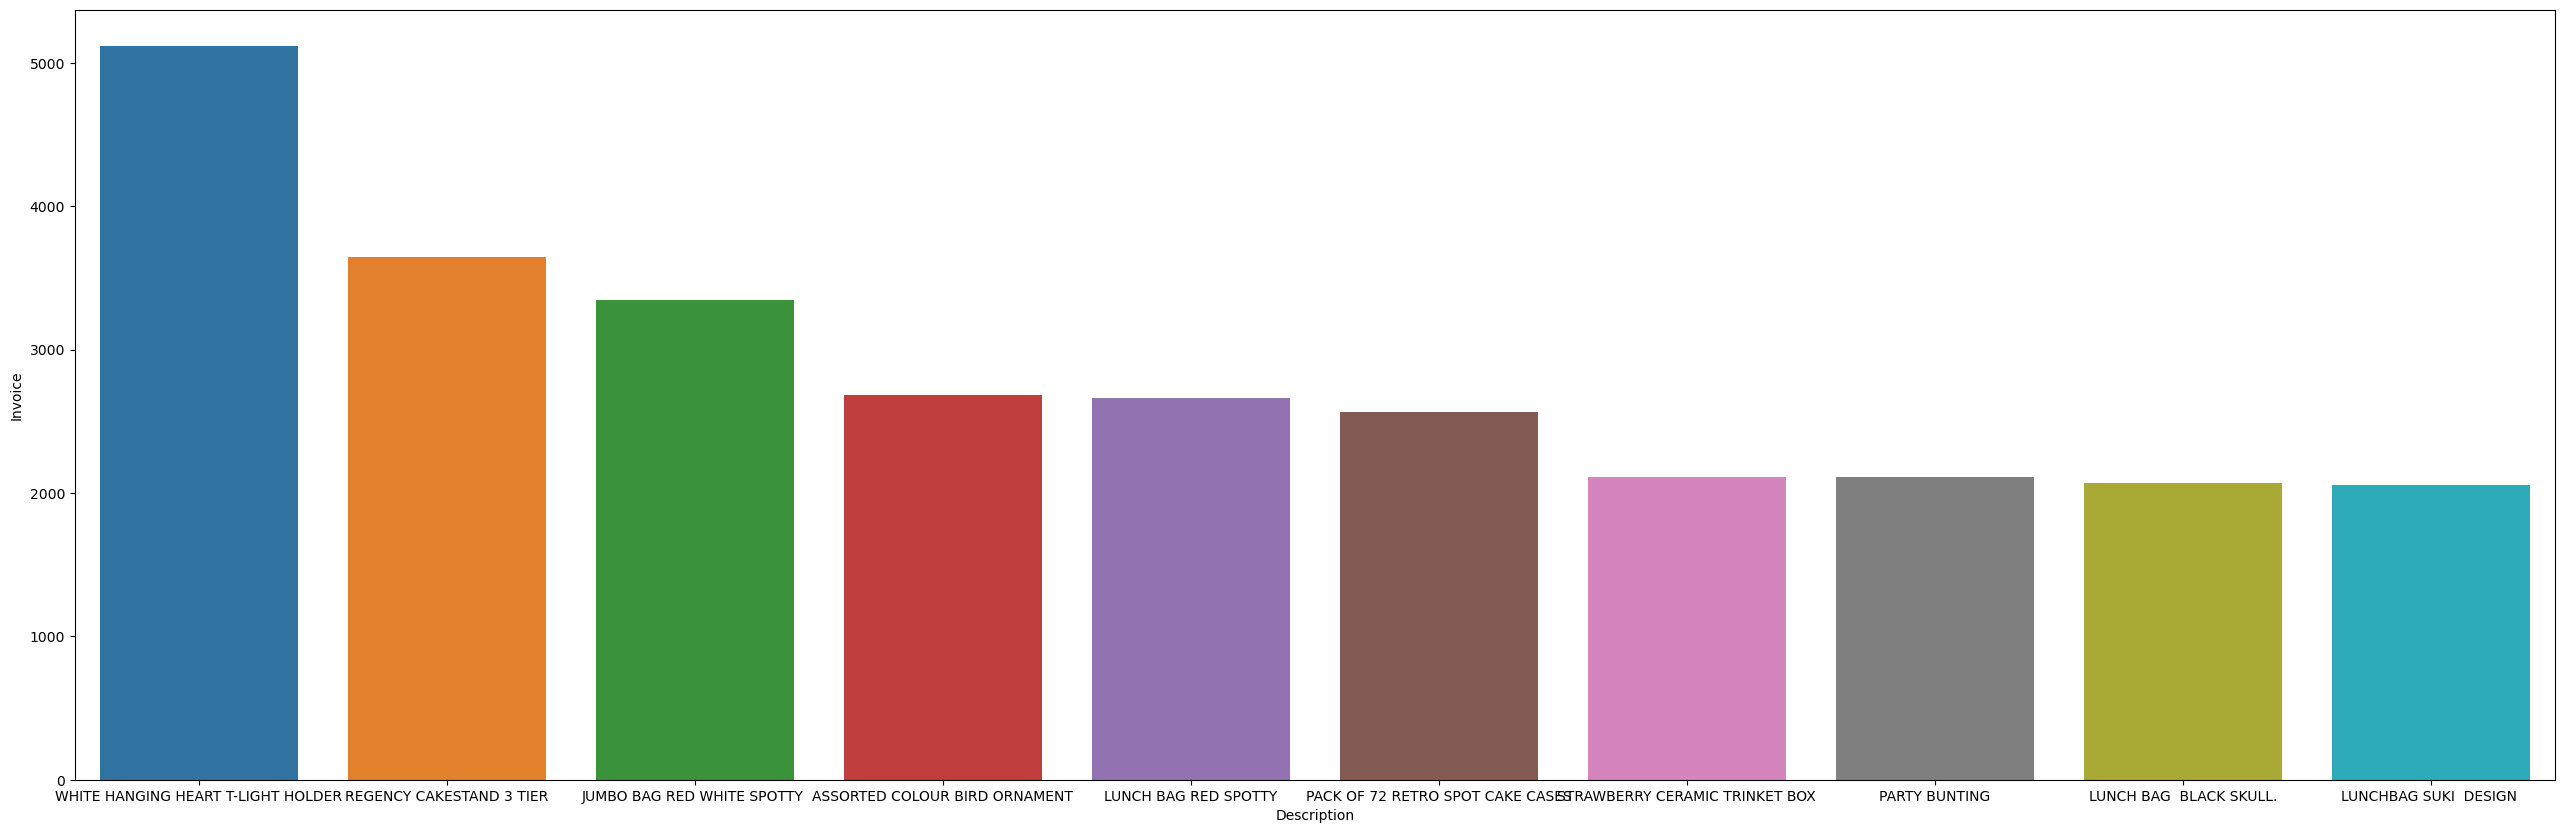

In [17]:
# top product all time

plt.figure(figsize= (32,10))

ds = df2.groupby('Description')['Invoice'].count().reset_index().sort_values(by= 'Invoice',ascending= False).head(10)
sns.barplot(x=ds['Description'], y= ds['Invoice'])

<AxesSubplot:xlabel='Description', ylabel='Invoice'>

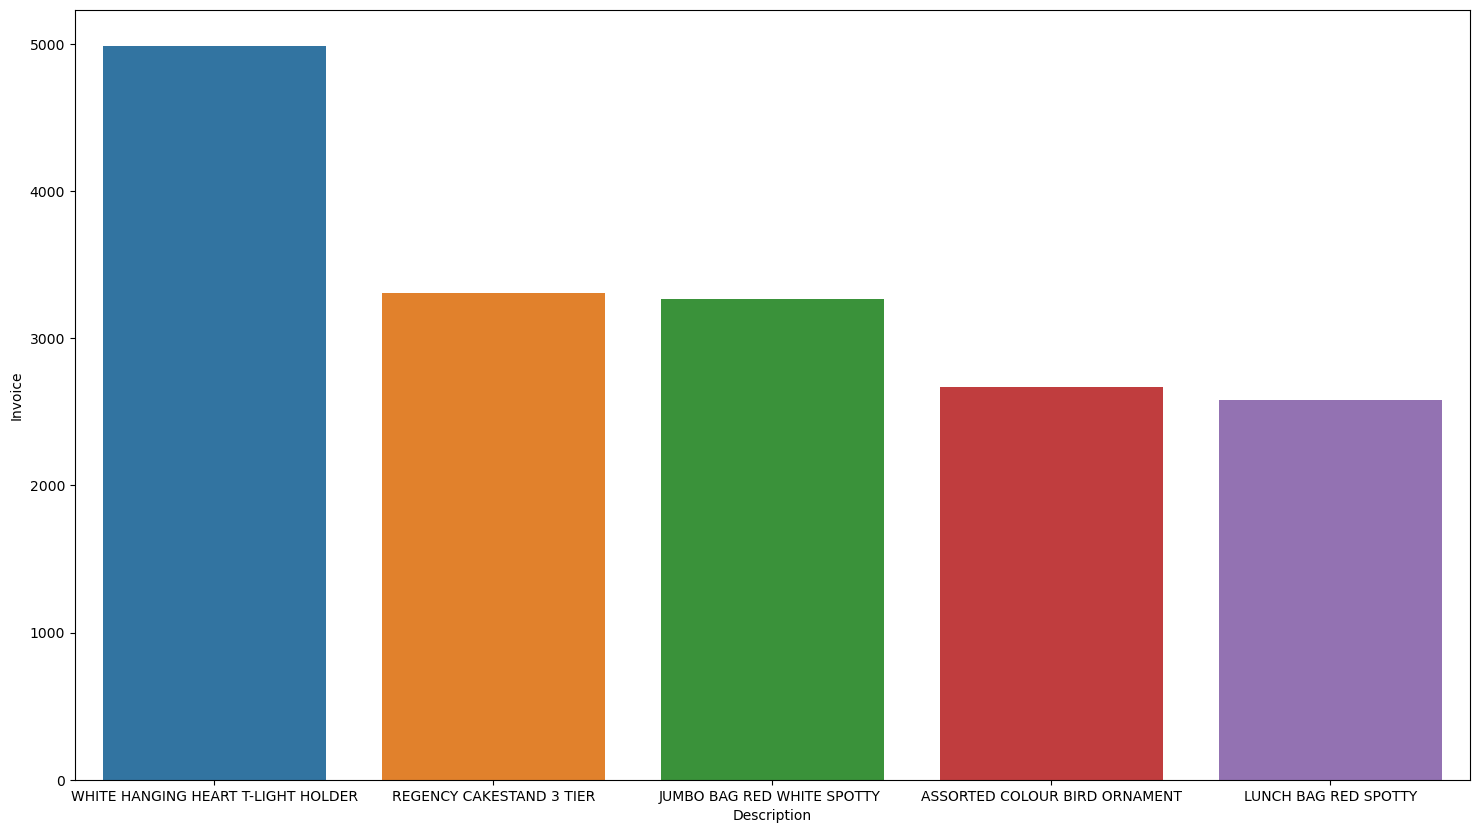

In [21]:
# top success product

plt.figure(figsize= (18,10))


ds = success.groupby('Description')['Invoice'].count().reset_index().sort_values(by= 'Invoice',ascending= False).head(5)
sns.barplot(x=ds['Description'], y= ds['Invoice'])

<AxesSubplot:xlabel='Description', ylabel='Invoice'>

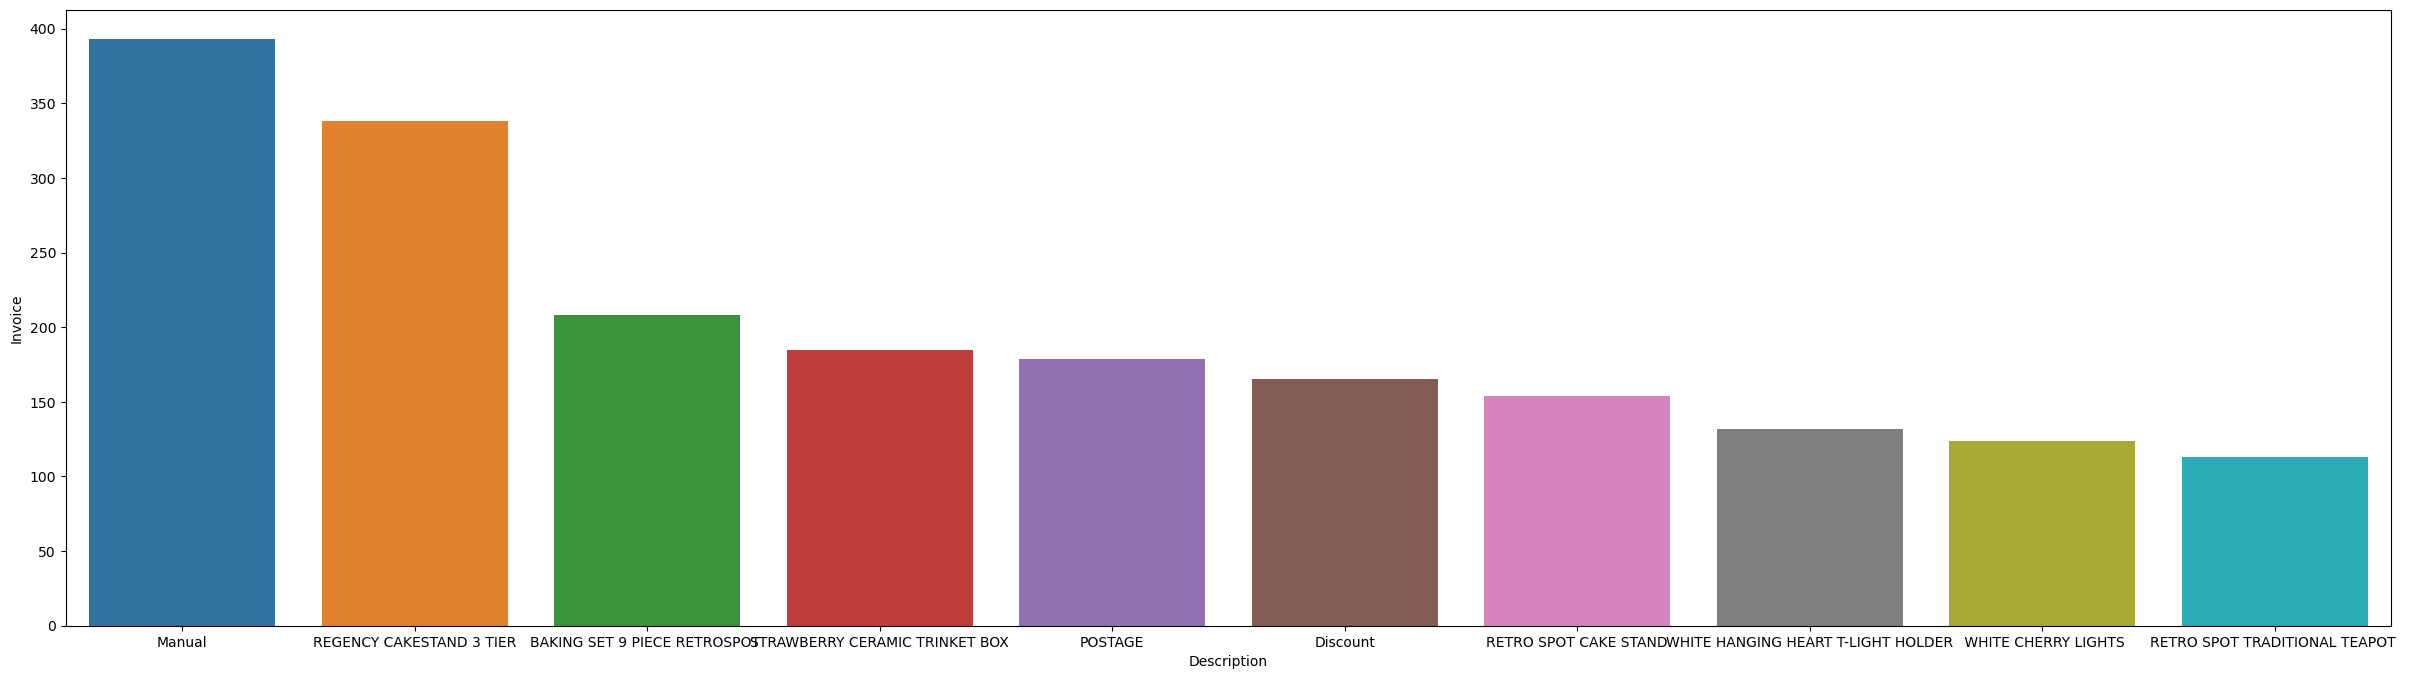

In [65]:
# most fail product

plt.figure(figsize= (30,8))

ds = fail.groupby('Description')['Invoice'].count().reset_index().sort_values(by= 'Invoice',ascending= False).head(10)
sns.barplot(x=ds['Description'], y= ds['Invoice'])

In [22]:
# top product by year

ds = df2.copy()
ds['Year'] = df['InvoiceDate'].dt.year
ds = ds.groupby(['Description','Year'])['Invoice'].count().reset_index()
top_2009 = ds[ds['Year'] == 2009].sort_values(by='Invoice',ascending = False).head(5)
top_2010 = ds[ds['Year'] == 2010].sort_values(by='Invoice',ascending = False).head(5)
top_2011 = ds[ds['Year'] == 2011].sort_values(by='Invoice',ascending = False).head(5)
top = pd.concat([top_2009,top_2010,top_2011],axis=0).sort_values(by=['Year','Invoice'],ascending=False)
top

,Description,Year,Invoice
9768,WHITE HANGING HEART T-LIGHT HOLDER,2011,1810
7356,REGENCY CAKESTAND 3 TIER,2011,1705
4729,JUMBO BAG RED WHITE SPOTTY,2011,1538
6130,PARTY BUNTING,2011,1375
597,ASSORTED COLOUR BIRD ORNAMENT,2011,1286
9767,WHITE HANGING HEART T-LIGHT HOLDER,2010,3013
7355,REGENCY CAKESTAND 3 TIER,2010,1937
4728,JUMBO BAG RED WHITE SPOTTY,2010,1689
5993,PACK OF 72 RETRO SPOT CAKE CASES,2010,1479
8947,STRAWBERRY CERAMIC TRINKET BOX,2010,1375


In [23]:
#product never have sales

fail[~(fail['Description'].isin(success['Description'].unique()))]['Description'].unique()

array(['SET OF KITCHEN WALL  STICKERS', 'WHITE ORCHID FLOWER LIGHTS',
       'VINTAGE BLUE VACUUM FLASK 0.5L ',
       'SET 6 MINI SUSHI SET FRIDGE MAGNETS',
       'ZINC HEART HANGER WITH HOOKS',
       'BLUE GREEN CHRISTMAS HANGING BALL ',
       'PURPLE ORCHID FLOWER LIGHTS', 'HAND OPEN SHAPE CHROME',
       'VINTAGE WOOD ORGANISER', 'LARGE GLASS HEART TRINKET POT',
       'S/4 HEART CRYSTAL FRIDGE MAGNETS',
       'ENGLISH ROSE DESIGN KITCHEN APRON',
       'LARGE SILVER BALUSTRADE CANDLESTICK', 'PINK EAR MUFF HEADPHONES',
       'CRUK Commission'], dtype=object)

In [24]:
# product that never have sales

no_sales = fail[~(fail['Description'].isin(success['Description'].unique()))]
no_sales = no_sales.groupby('Description')['Invoice'].nunique().reset_index()
no_sales.columns = ['no_sales_description','total_engage']
# sns.barplot(y=no_sales['total_engage'],x=no_sales['no_sales_description'])
no_sales.sort_values(by='total_engage',ascending=False)

,no_sales_description,total_engage
1,CRUK Commission,15
13,WHITE ORCHID FLOWER LIGHTS,5
2,ENGLISH ROSE DESIGN KITCHEN APRON,2
6,PINK EAR MUFF HEADPHONES,2
7,PURPLE ORCHID FLOWER LIGHTS,2
0,BLUE GREEN CHRISTMAS HANGING BALL,1
3,HAND OPEN SHAPE CHROME,1
4,LARGE GLASS HEART TRINKET POT,1
5,LARGE SILVER BALUSTRADE CANDLESTICK,1
8,S/4 HEART CRYSTAL FRIDGE MAGNETS,1


In [ ]:
# this product is never have success sale for the recomendation can do to delete this product from stock

In [12]:
#penjualan kotor (total gross sales) by year & percentage

ds = success.copy()
ds['Year'] = ds['InvoiceDate'].dt.year
ds['totalprice'] = ds['Quantity']*ds['Price']
t = ds.groupby('Year')['totalprice'].sum().reset_index()
t['change_percentage'] =  t['totalprice'].pct_change().mul(100).fillna(0)
t

,Year,totalprice,change_percentage
0,2009,683504.010,0.000000
1,2010,8374496.094,1125.229987
2,2011,7898900.844,-5.679091


In [24]:
#Customer count
a= ds[ds['Year'] == 2009]['Customer ID'].nunique()
b = ds[ds['Year'] == 2010]['Customer ID'].nunique()
c= ds[ds['Year'] == 2011]['Customer ID'].nunique()

print(f'Count of customer:\n2009:{a}\n2010:{b}\n2011:{c}')

Count of customer:
2009:955
2010:4233
2011:4189


In [49]:
sum(t['totalprice'])

16956900.948

In [26]:
# product product gross sales terbanyak

ds = success.copy()
ds['Year'] = ds['InvoiceDate'].dt.year
ds['totalprice'] = ds['Quantity']*ds['Price']
ds = ds.groupby(['Year','Description'])['totalprice'].sum().reset_index()
top_2009 = ds[ds['Year'] == 2009].sort_values(by='totalprice',ascending = False).head(5)
top_2010 = ds[ds['Year'] == 2010].sort_values(by='totalprice',ascending = False).head(5)
top_2011 = ds[ds['Year'] == 2011].sort_values(by='totalprice',ascending = False).head(5)
top = pd.concat([top_2009,top_2010,top_2011],axis=0).sort_values(by=['Year','totalprice'],ascending=False)
top

,Year,Description,totalprice
9144,2011,REGENCY CAKESTAND 3 TIER,120721.42
10000,2011,WHITE HANGING HEART T-LIGHT HOLDER,89230.81
8431,2011,MEDIUM CERAMIC TOP STORAGE JAR,81243.22
8227,2011,JUMBO BAG RED WHITE SPOTTY,80580.90
9000,2011,POSTAGE,71270.96
5542,2010,REGENCY CAKESTAND 3 TIER,152973.00
6420,2010,WHITE HANGING HEART T-LIGHT HOLDER,139832.45
4868,2010,Manual,96379.47
4532,2010,JUMBO BAG RED WHITE SPOTTY,79986.60
2937,2010,ASSORTED COLOUR BIRD ORNAMENT,64319.53


In [ ]:
#  product thats always in top 5 each year provide high gross sales
# REGENCY CAKESTAND 3 TIER, WHITE HANGING HEART T-LIGHT HOLDER, this can be plan for discount 
#for customer that low on loyality

## RFM (Recency, Frequency, and Monetary) 

In [38]:
########
#the records is from [01/12/2009] until ['10/12/2011'])

#RFM method 
# Recency = refers to newest purchase or customer last transaction  (grouped Customer [last_invoice date - max date])
#Frequency = refers to how much customer do transaction, sum of customer transaction (invoice No diff count)
#Monetary = refers to how much customer spending their money, total price (Unitprice(quantity) diff customer)

#from information and check there is canceled purchase with InvoiceNo startswith C, so for frequency, and  monetary 
# can be split  (fail_frequency, success_frequency, full_monetary, fail_monetary, success_monetary)

In [25]:
df2['Customer ID'].nunique()
# there is 5924 customer unique

5924

In [18]:
# recency
max_date = df2['InvoiceDate'].max()
df2['Diff'] = (max_date - df2['InvoiceDate']).dt.days
recency = df2.groupby('Customer ID')['Diff'].min().reset_index()
recency.shape

#already equivalent to unique customer

(5924, 2)

In [19]:
#frequency
sf = df2[~(df2['Invoice'].str.startswith('C'))]
success_frequency = sf.groupby(['Customer ID'])['Invoice'].nunique().reset_index()
success_frequency.shape

#there is null if concat, this the customer success frequency = 0

(5863, 2)

In [20]:
#expenditure for monetary

df2['total_expend'] = df2['Quantity'] * df2['Price']

In [21]:
# success monetary
success_monetary = df2[~(df2['Invoice'].str.startswith('C'))].groupby(['Customer ID'])['total_expend'].sum().reset_index()
success_monetary.shape

#same for null this is customer monetary = 0

(5863, 2)

In [14]:
RFM = recency.merge(success_frequency,how='left',on = 'Customer ID')
RFM = RFM.merge(success_monetary,how='left',on = 'Customer ID')
RFM.columns =  ['CustomerID','recency','frequency','monetary']
RFM.isnull().sum()

# there is value that null meaning that are customers that never success buy  

CustomerID     0
recency        0
frequency     61
monetary      61
dtype: int64

In [31]:
61/len(RFM['CustomerID'].unique())

#only 1 % from all customer

0.010297096556380824

In [22]:
RFM['frequency'] = np.where(RFM['frequency'].isnull(), 0,RFM['frequency'])
RFM['monetary'] = np.where(RFM['monetary'].isnull(), 0,RFM['monetary'])

In [33]:
RFM.shape

(5924, 4)

## DATA VISUALIZATION

In [24]:
RFM.describe([.1,.25,.4,.5,.6,.75,.8])

,recency,frequency,monetary
count,5924.000000,5924.000000,5924.000000
mean,210.114619,6.155132,2862.407317
std,216.391477,12.809520,13979.460934
min,0.000000,0.000000,0.000000
10%,11.000000,1.000000,151.493000
25%,29.000000,1.000000,329.010000
40%,66.200000,2.000000,589.310000
50%,114.000000,3.000000,838.705000
60%,195.000000,4.000000,1188.404000
75%,381.000000,7.000000,2202.280000


In [ ]:
# nilai describe menunjukan 50 % dari customer menunjukan purchase recencies sekitar kurun 3 bulan
# frequency kurang dari 3 dan monetary kurang dari 838 poundsterling (masih terbilang kecil)

### UNIVARIATE

In [34]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5924 entries, 0 to 5923
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  5924 non-null   object 
 1   recency     5924 non-null   int64  
 2   frequency   5924 non-null   float64
 3   monetary    5924 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 231.4+ KB


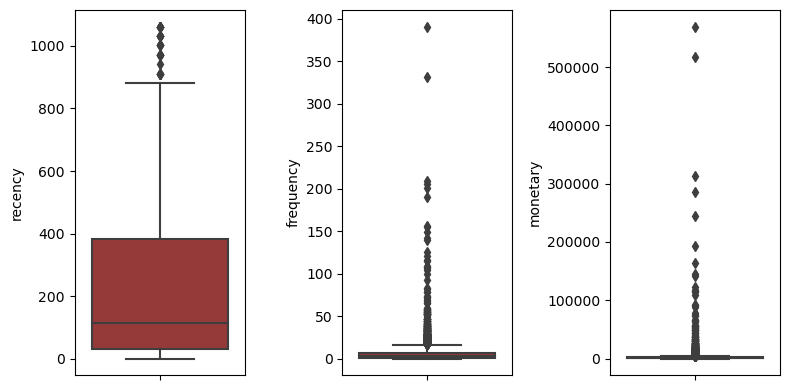

In [35]:
plt.figure(figsize=(8,4))
index = 1
cols = list(RFM.columns)
cols.remove('CustomerID')

for i in cols:
    plt.subplot(1,len(cols),index)
    sns.boxplot(y= RFM[i], color='Brown')
    index += 1
    plt.tight_layout()

In [27]:
RFM.skew()

# frequency, monetary, tag_count are skewed and so many outliers 

CustomerID    -0.000345
recency        1.013410
frequency     12.634417
monetary      25.658176
dtype: float64

### OUTLIER

In [28]:
d_skew = [i for i in RFM.columns if i != 'CustomerID']#['f_frequency', 's_frequency', 'f_monetary','s_monetary', 'real_monetary'] 

In [29]:
#####
def check_outliers(column = str, RFM = pd.DataFrame):
    Q3 = RFM[column].quantile(q=0.75)
    Q1 = RFM[column].quantile(q=0.25)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    results_top = []
    results_down = []
    for index,val in enumerate(RFM[column]):
        if (val < min_IQR):
            results_down.append(val)
        elif (val > max_IQR):
            results_top.append(val)
    print(f"column :{column}\nnum_outliers:{len(results_top) + len(results_down)}\n")
    return results_top,results_down
        

values = {}
for j,i in enumerate(d_skew):
    print(j,i)
    value_top,value_down = check_outliers(i,RFM)
    values[j] = [value_top,value_down]

0 recency
column :recency
num_outliers:33

1 frequency
column :frequency
num_outliers:416

2 monetary
column :monetary
num_outliers:635



In [30]:
print(33/len(RFM))
print(416/len(RFM))
print(635/len(RFM))

0.005570560432140445
0.07022282241728561
0.10719108710330857


In [31]:
#f_frequency outlier
top1 = values[1][0]
down1 = values[1][1]

In [32]:
RFM[RFM['frequency'].isin(top1)].describe()

,recency,frequency,monetary
count,416.000000,416.000000,416.000000
mean,32.514423,35.112981,20831.613978
std,56.244002,35.624402,48388.807977
min,0.000000,17.000000,1807.440000
25%,5.000000,20.000000,6323.635000
50%,15.000000,25.000000,9496.215000
75%,32.000000,35.000000,16786.962500
max,395.000000,391.000000,569501.500000


In [52]:
#f_monetary outlier
top1 = values[2][0]
down1 = values[2][1]

In [53]:
RFM[RFM['monetary'].isin(top1)].describe()

,recency,frequency,monetary
count,635.000000,635.000000,635.000000
mean,49.549606,25.593701,17367.021383
std,89.106724,31.345615,39736.859564
min,0.000000,1.000000,5020.740000
25%,9.000000,12.000000,6361.405000
50%,19.000000,18.000000,8706.970000
75%,52.000000,28.000000,14064.720000
max,633.000000,391.000000,569501.500000


## MODELING

In [91]:
#set customer id as index

X = RFM.set_index('CustomerID')
col = list(X.columns)

In [92]:
# # SCALING
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std = pd.DataFrame(X_std,columns=col)
X_std.describe()

,recency,frequency,monetary
count,5.924000e+03,5.924000e+03,5.924000e+03
mean,-1.392464e-17,-1.297517e-16,2.237922e-17
std,1.000084e+00,1.000084e+00,1.000084e+00
min,-9.710750e-01,-4.805528e-01,-2.047753e-01
25%,-8.370473e-01,-4.024793e-01,-1.812381e-01
50%,-4.442076e-01,-2.463323e-01,-1.447748e-01
75%,7.897714e-01,6.596185e-02,-4.722521e-02
max,3.937111e+00,3.004620e+01,4.053711e+01


In [93]:
range_n_clusters = list(range(3,15))

### MODEL TEST

#### KMEANS

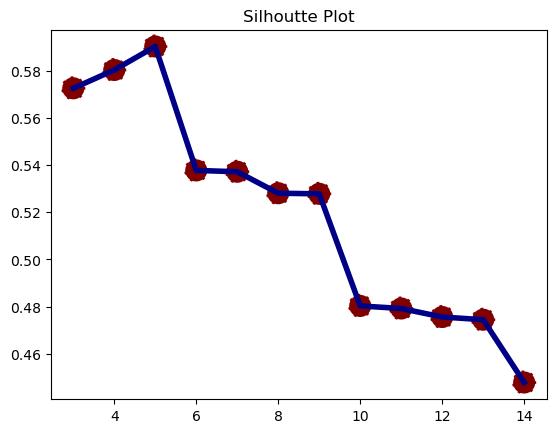

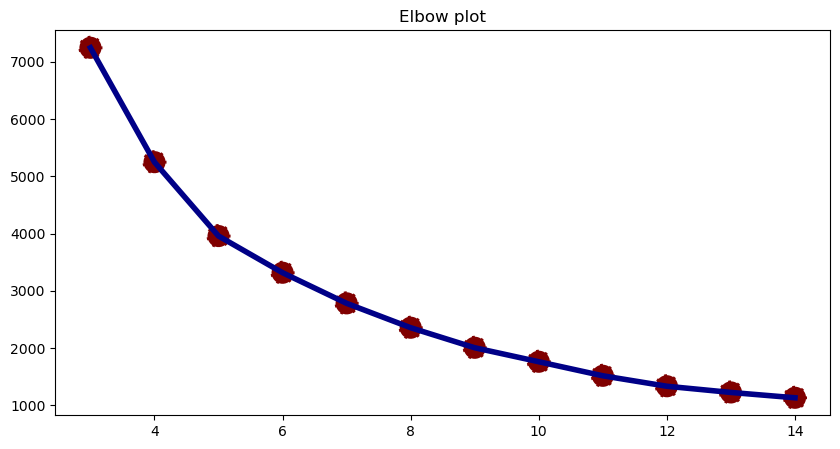

In [94]:
#cluster planning with elbow and silhoutte

silhouttemodel_plot(X_std,range_n_clusters,model='k-means')
elbowmodel_plot(X_std,range_n_clusters)

In [ ]:
# candidate 3,4,5

In [106]:
# after test we choose 3

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_std)

Xk= X.copy()
Xk['Cluster'] = kmeans.labels_
Xk.head(3)

,recency,frequency,monetary,Cluster
CustomerID,,,,
12346.0,326,12.0,77556.46,0
12347.0,40,7.0,4696.71,0
12348.0,76,5.0,2019.40,0


In [102]:
Xk['Cluster'].unique()

array([0, 1, 2])

In [107]:
Xk.groupby(['Cluster']).agg({
    'recency': ['mean','median', 'count'],
    'frequency': ['mean','median'],
    'monetary': ['mean','median'],
})

recency                frequency              monetary            
               mean median count        mean median           mean      median
Cluster                                                                       
0         72.491224   46.5  3874    7.545431    5.0    3095.459983    1341.450
1        474.925086  437.0  2029    2.031543    1.0     682.655280     352.821
2         12.619048    5.0    21  148.095238  140.0  170475.305238  117763.620

In [32]:
Xk[Xk['Cluster'] == 1].sample(10)

,recency,frequency,monetary,Cluster
CustomerID,,,,
15260.0,101,25.0,8767.73,1
18184.0,16,1.0,49.80,1
18017.0,82,4.0,688.00,1
13892.0,27,6.0,1267.65,1
15657.0,23,1.0,30.00,1
16041.0,90,3.0,3166.40,1
15063.0,66,1.0,370.80,1
15763.0,74,2.0,1086.92,1
14552.0,33,3.0,507.93,1


In [ ]:
1
#mm mean	60.158459	8.604127	4156.215426	1.0
70%	75.000000	8.000000	2862.944000	1.0

#sc 72.491224	7.545431	3095.459983	0.0
70%	88.000000	8.000000	2667.274000	0.0

2
#mm mean	624.306389	1.357236	482.079884	
70%	656.200000	1.000000	372.098000	

#sc mean	474.925086	2.031543	682.655280	
70%	530.000000	2.000000	619.032000	1.0



In [ ]:
# cluster lebih bagus standard scaler

#### DBSCAN

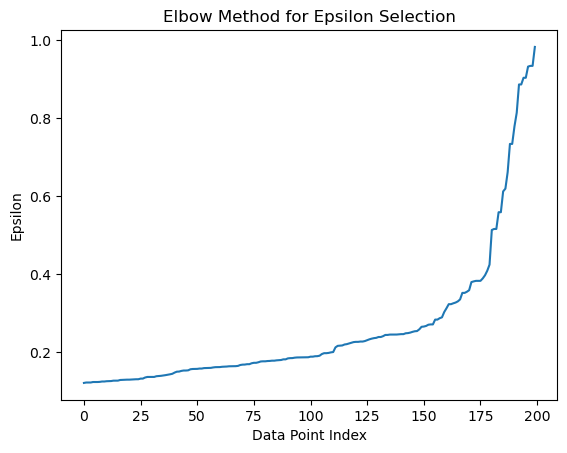

In [45]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=3)
neighbors = neigh.fit(X_std).kneighbors(X_std)[0]
distances = np.sort(neighbors[:, 1])

plt.plot(distances[5700:5900])
plt.xlabel("Data Point Index")
plt.ylabel("Epsilon")
plt.title("Elbow Method for Epsilon Selection")
plt.show()

In [108]:
dbs = DBSCAN(eps=0.4,min_samples=8)
dbs.fit(X_std)

DBSCAN(eps=0.4, min_samples=8)

In [109]:
X_dbs = X.copy()
X_dbs['Cluster'] = dbs.labels_
X_dbs.head(3)

,recency,frequency,monetary,Cluster
CustomerID,,,,
12346.0,326,12.0,77556.46,-1
12347.0,40,7.0,4696.71,0
12348.0,76,5.0,2019.40,0


In [110]:
X_dbs['Cluster'].unique()

array([-1,  0,  1], dtype=int64)

In [111]:
#  median dan rata rata tiap cluster
X_dbs.groupby(['Cluster']).agg({
    'recency': ['mean','median', 'count'],
    'frequency': ['mean','median'],
    'monetary': ['mean','median'],
})

recency               frequency             monetary          
               mean median count       mean median          mean    median
Cluster                                                                   
-1        83.182796   12.0    93  65.763441   51.0  63318.551215  34281.18
 0       212.417139  117.0  5823   5.140821    3.0   1871.826843    816.60
 1         9.750000   11.0     8  51.500000   52.5  21078.497500  21843.78

In [25]:
X_dbs[X_dbs['Cluster'] == 0].head(10)

,recency,frequency,monetary,Cluster
CustomerID,,,,
12347.0,40,7.0,4696.71,0
12348.0,76,5.0,2019.40,0
12349.0,19,4.0,4428.69,0
12350.0,311,1.0,334.40,0
12351.0,376,1.0,300.93,0
12352.0,73,10.0,2849.84,0
12353.0,204,2.0,406.76,0
12354.0,233,1.0,1079.40,0
12355.0,96,2.0,947.61,0


#### AGGLOMERATIVE CLUSTERING

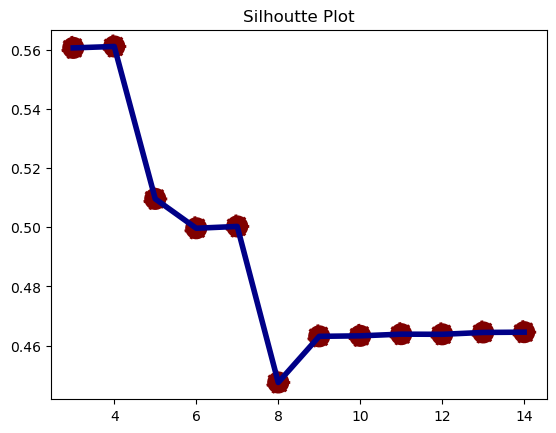

In [112]:
silhouttemodel_plot(X_std,range_n_clusters,model='agglomerative')

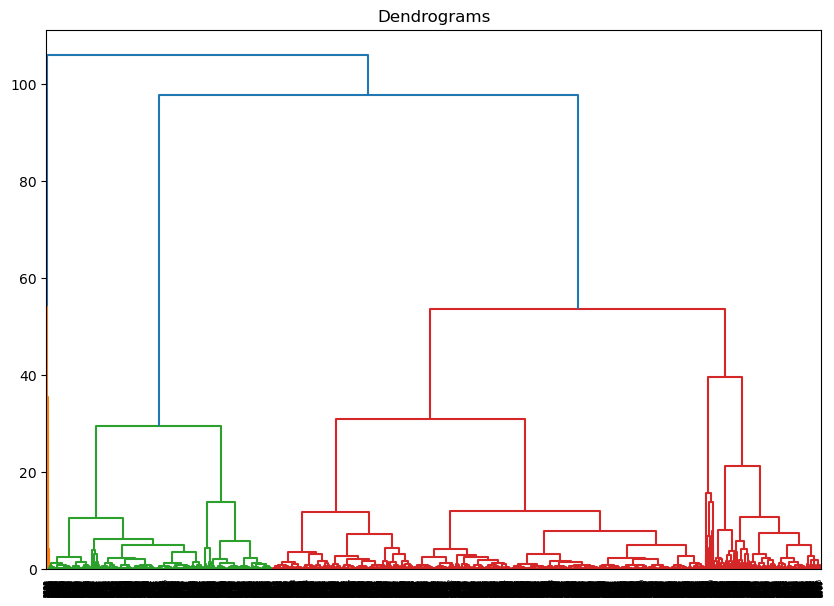

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))
# plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
# candidate n cluster = 3/4, we choose 3

In [117]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_std)

AgglomerativeClustering(n_clusters=3)

In [118]:
X_agg = X.copy()
X_agg['Cluster'] = agg.labels_
X_agg.head(3)

,recency,frequency,monetary,Cluster
CustomerID,,,,
12346.0,326,12.0,77556.46,1
12347.0,40,7.0,4696.71,1
12348.0,76,5.0,2019.40,1


In [119]:
X_agg['Cluster'].unique()

array([1, 2, 0], dtype=int64)

In [120]:
#  median dan rata rata tiap cluster
X_agg.groupby(['Cluster']).agg({
    'recency': ['mean','median', 'count'],
    'frequency': ['mean','median'],
    'monetary': ['mean','median'],
})

recency                frequency              monetary            
               mean median count        mean median           mean      median
Cluster                                                                       
0         11.555556    5.0    18  156.166667  145.5  186255.645556  132116.975
1         89.574017   53.0  4195    7.209535    4.0    2968.274290    1221.560
2        507.742840  471.0  1711    1.991818    1.0     673.517641     340.500

In [124]:
Xk[Xk['Cluster'] == 1].describe([.5,.6,.7,.8,.9])

,recency,frequency,monetary,Cluster
count,2029.000000,2029.000000,2029.000000,2029.0
mean,474.925086,2.031543,682.655280,1.0
std,143.609171,1.880291,1365.009343,0.0
min,257.000000,0.000000,0.000000,1.0
50%,437.000000,1.000000,352.821000,1.0
60%,481.800000,2.000000,447.434000,1.0
70%,530.000000,2.000000,619.032000,1.0
80%,597.000000,3.000000,915.070000,1.0
90%,666.000000,4.000000,1404.600000,1.0
max,1062.000000,20.000000,34095.260000,1.0


In [123]:
X_agg[X_agg['Cluster'] == 2].describe([.5,.6,.7,.8,.9])

,recency,frequency,monetary,Cluster
count,1711.00000,1711.000000,1711.000000,1711.0
mean,507.74284,1.991818,673.517641,2.0
std,132.16990,1.893029,1423.761253,0.0
min,342.00000,0.000000,0.000000,2.0
50%,471.00000,1.000000,340.500000,2.0
60%,514.00000,2.000000,433.770000,2.0
70%,564.00000,2.000000,603.250000,2.0
80%,620.00000,3.000000,880.620000,2.0
90%,680.00000,4.000000,1378.740000,2.0
max,1062.00000,20.000000,34095.260000,2.0


## VISUALISASI

#### USING RADAR CHART

In [19]:
#plot scale

X_scale = minmax_scale(X[X.columns[0:-1]])
X_scale = pd.DataFrame(X_scale,index=X.index,columns=X.columns[0:-1])
X_scale['Cluster'] = X['Cluster']

#mean plot
group_mean = X_scale.groupby(['Cluster']).agg({
    'recency': ['mean'],
    'frequency': ['mean'],
    'monetary': ['mean']
})

#median plot
group_median = X_scale.groupby(['Cluster']).agg({
    'recency': ['median'],
    'frequency': ['median'],
    'monetary': ['median']
})

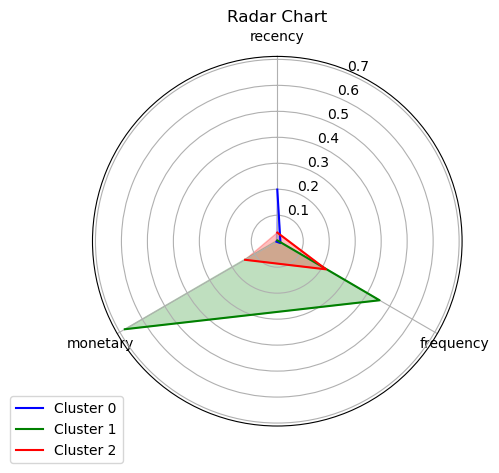

In [22]:
# mean
features = list(X.columns[0:-1])
colors = ['b', 'g', 'r'] 
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

for i in range(3):  
    radar_chart(ax, features, group_mean.values[i], f'Cluster {i}', colors[i])
plt.show()

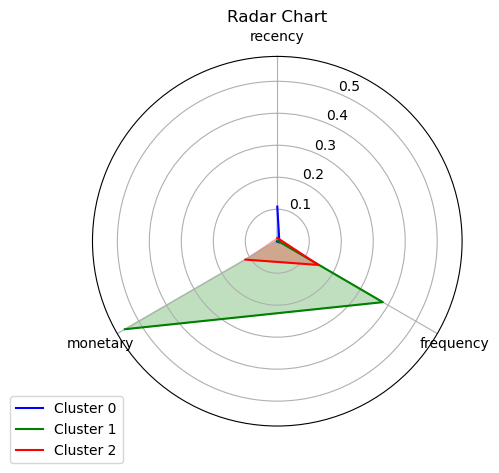

In [23]:
# median
fig, ax = plt.subplots(subplot_kw=dict(polar=True))

for i in range(3):  
    radar_chart(ax, features, group_median.values[i], f'Cluster {i}', colors[i])

plt.show()

## INSIGHT

In [24]:
col

['recency', 'frequency', 'monetary']

In [125]:
#  median dan rata rata tiap cluster
Xk.groupby(['Cluster']).agg({
    'recency': ['mean','median', 'count'],
    'frequency': ['mean','median'],
    'monetary': ['mean','median'],
})

recency                frequency              monetary            
               mean median count        mean median           mean      median
Cluster                                                                       
0         72.491224   46.5  3874    7.545431    5.0    3095.459983    1341.450
1        474.925086  437.0  2029    2.031543    1.0     682.655280     352.821
2         12.619048    5.0    21  148.095238  140.0  170475.305238  117763.620

#### segmentation

##### total sales 16.956.900,948 poundsterling

#### cluster 0 :
    customer recency not too long ago ,half year average recency (more than 6 months), frequency very low (average 7), and monetary medium (average 3 thousand poundsterling, most of customer in record (3874 count)

#### cluster 1:
    customer that recency long time ago, frequency very low (average 2), and very low monetary (average 682 poundsterling), half  customers (2029 count)

#### cluster 2:
    customer that recency near (average 12 days), frequency very often (average 148 count), and monetary very high (average 170.475 poundsterling), only few customers (21 count)
 

1. K-Means v
2. Std Scaling + K-Means v
3. MinMax + K-Means v
4. PCA + K-Means x
5. Kombinasi semuanya dengan K-Medoids x
Scaling + PCA + K-Means x
Hierarchical Clustering v
DBScan v
Manual. Skor 1-4 untuk R, begitu juga F, begitu juga M. Kemudian total skor maksimal 12. Total skor 11 dan 12 menrupakan cluster 1. x

In [126]:
# upload = X.groupby(['Cluster']).agg({
#     'recency': ['mean','median'],
#     'f_frequency':['mean','median'],
#     's_frequency': ['mean','median'],
#     'f_monetary': ['mean','median'],
#     's_monetary': ['mean','median'],
#     'real_monetary': ['mean','median'],
# })

In [127]:
# with pd.ExcelWriter('C:/Users/hp/Downloads/tabelcung.xlsx', engine='xlsxwriter') as writer:
#     upload.to_excel(writer, sheet_name='Sheet1')